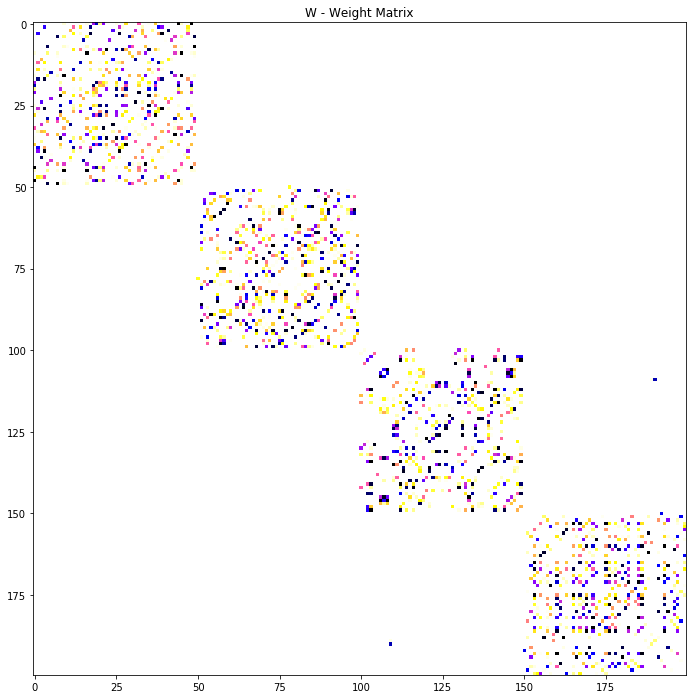

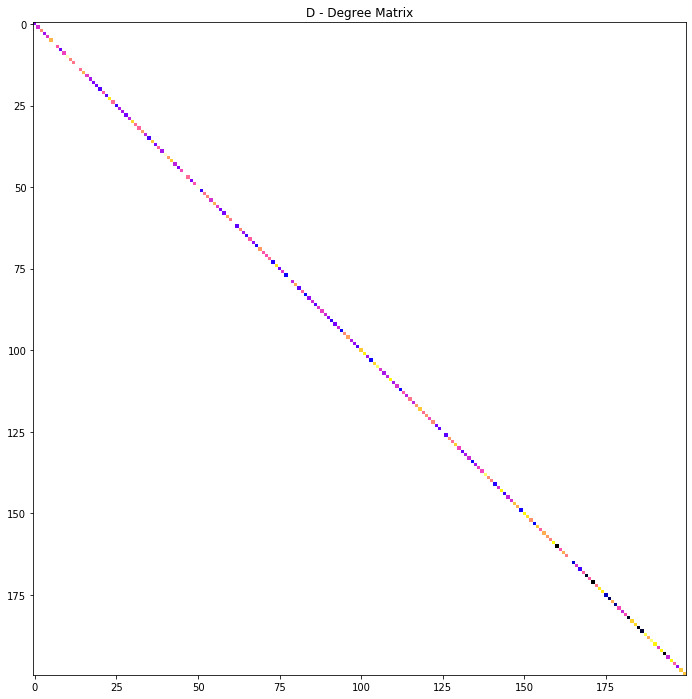

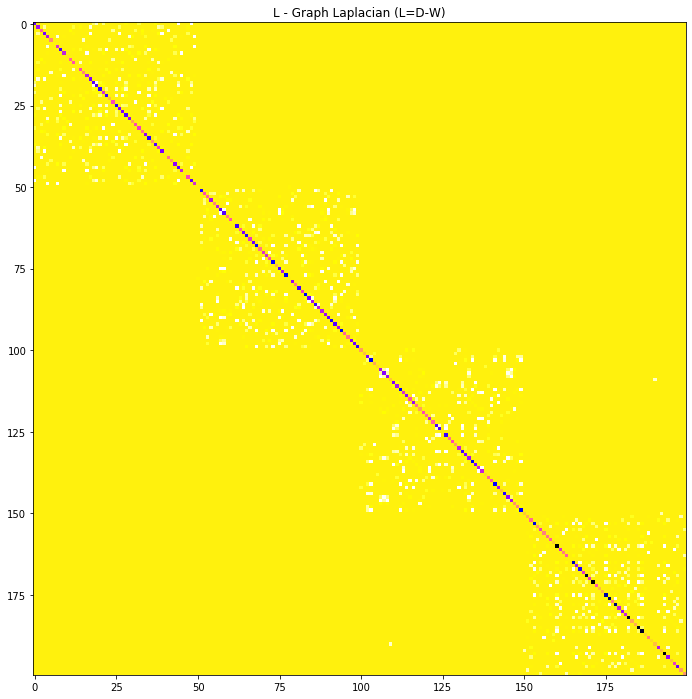

Output of KMeans Clustering


array([[-1.92182971e-11,  7.19572939e-02, -1.73472348e-17,
        -5.00717433e-11],
       [-5.35849514e-02, -1.73472348e-17, -1.73472348e-17,
         5.18002900e-02],
       [-5.35849516e-02, -1.38777878e-17, -1.38777878e-17,
        -5.51790610e-02],
       [-2.89640992e-08, -2.81581624e-03,  7.85533238e-02,
        -3.36368686e-08]])

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

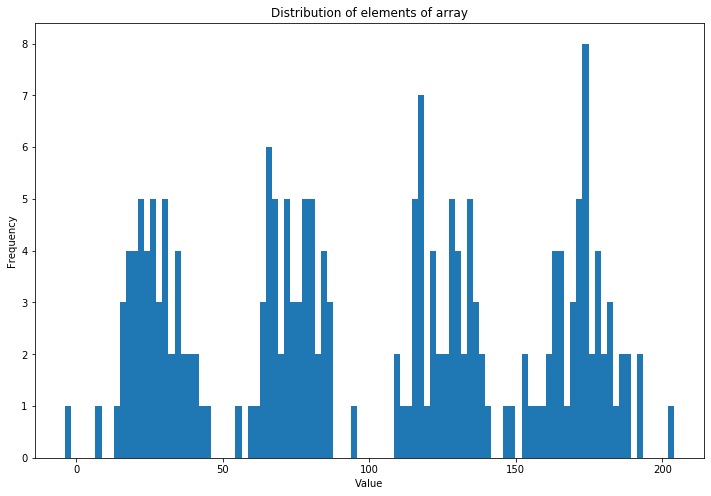

Cluster counts and Ranges:


,Label,count,min,max
3,3,50,-3.747981,45.987859
0,0,50,56.244772,95.014631
2,2,47,109.349745,141.553877
1,1,53,146.469596,203.849148


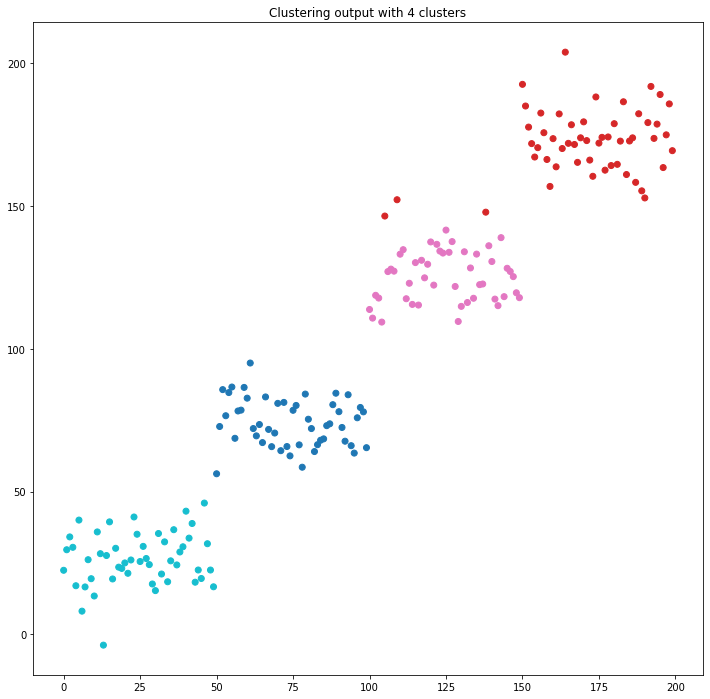

In [6]:
import scipy as sp
import scipy.linalg as linalg
from sklearn.cluster import KMeans
import numpy as np
import spectral_clustering_helper as scplot
import pandas as pd


########################
#       Parameters     #
########################

k=4 #Number of clusters (segments of graphs to create)
dist_centers = [25,75,125,175]
dist_sd = 10
dist_cnt = 50



########################
#       Setup etc      #
########################

#Functions 
def similarity(x,y):
    return sp.exp((-(x-y)**2)/2)

#Initialize Graph Vertices and construct L,D and W
x_list = sp.concatenate([sp.random.normal(c,dist_sd,dist_cnt) for c in dist_centers])

L,W,D = scplot.createMatrices(x_list, similarity)


#Plot L,D and W
scplot.plot_matrix(W, "W - Weight Matrix")
scplot.plot_matrix(D,"D - Degree Matrix")
scplot.plot_matrix(L,"L - Graph Laplacian (L=D-W)")



########################
#       Clustering     #
########################

# eigen values and clustering
e_val,e_vec = linalg.eigh(L,D)

km = KMeans(n_clusters=k).fit(e_vec[:,0:k])

# plot output
print("Output of KMeans Clustering")
display(km.cluster_centers_)
display(km.labels_)

########################
#       Outputs        #
########################

data_cluster = pd.DataFrame({'Data':x_list, 'Label':km.labels_})
data_cluster_result = data_cluster.groupby('Label').Data.agg(['count','min','max']).reset_index()
data_cluster_result.sort_values('min', inplace=True)

scplot.plot_histo(x_list)

print("Cluster counts and Ranges:")
display(data_cluster_result)
    
scplot.plot_clusters(x_list,km.labels_,"Clustering output with "+str(k)+" clusters")




Interesting observation:

also affected by number of eigen vectors chosen similar to un-normalized variant.